In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
save_results = True
experiments = [
    '../articulation_points_monoplex/results/ER/results_ER.json',
    '../articulation_points_multiplex/results/ER/results_ER.json',
    '../articulation_points_multiplex/results/ER_three/results_ER_three.json',
]

In [3]:
experiment_ids = dict(zip(experiments, [1, 2, 3]))
experiment_ids

{'../articulation_points_monoplex/results/ER/results_ER.json': 1,
 '../articulation_points_multiplex/results/ER/results_ER.json': 2,
 '../articulation_points_multiplex/results/ER_three/results_ER_three.json': 3}

In [4]:
crange = {}
n_ap = {}
gcc_size = {}
T = {}
max_t = {}
max_t_for_plots = {}

for experiment in experiments:
    experiment_id = experiment_ids[experiment]

    with open(experiment, 'r') as json_file:
        results = json.load(json_file)
        N = results['N']
        nruns = results['nruns']
        crange[experiment_id] = np.linspace(*results['crange'])
        results = results['results']

    T[experiment_id] = []
    for result in results:
        T[experiment_id].append(np.mean([
            max(item['t'] for item in run['cascade'])
            for run in result['runs']
        ]))

    max_t[experiment_id] = max(item['t']
                for result in results
                for run in result['runs']
                for item in run['cascade'])
    max_t_for_plots[experiment_id] = min(10, max_t[experiment_id])
    
    n_ap[experiment_id] = {t: [] for t in range(max_t[experiment_id] + 1)}
    gcc_size[experiment_id] = {t: [] for t in range(max_t[experiment_id] + 1)}

    for result in results:

        n_ap_loc = {t: 0 for t in range(max_t[experiment_id] + 1)}
        gcc_size_loc = {t: 0 for t in range(max_t[experiment_id] + 1)}
        num_gcc_t = {t: 0 for t in range(max_t[experiment_id] + 1)}

        for run in result['runs']:
            for item in run['cascade']:

                n_ap_loc[item['t']] += item['n_ap']
                gcc_size_loc[item['t']] += item['gcc_size']
                num_gcc_t[item['t']] += 1

        for t in range(max_t[experiment_id] + 1):

            n_ap[experiment_id][t].append(n_ap_loc[t] / nruns / N)
            gcc_size[experiment_id][t].append(gcc_size_loc[t] / num_gcc_t[t] / N
                                              if num_gcc_t[t]
                                              else gcc_size[experiment_id][t - 1][-1])

In [5]:
lw, ms = 1, 4
xmax = 8

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', size=22, **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['savefig.bbox'] = 'tight'

In [7]:
fontsize = 36
labelsize = 26
legendsize = 18

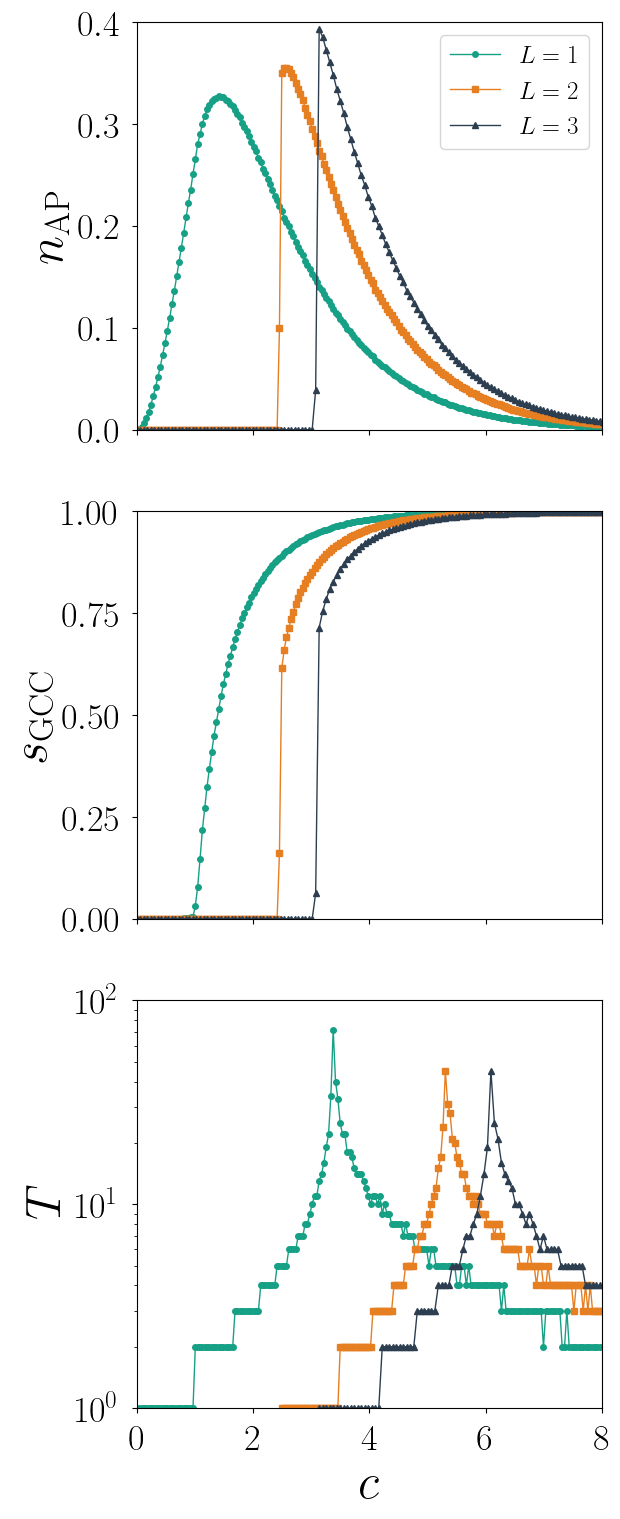

In [8]:
plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 18))

plt.subplot(3, 1, 1)
plt.plot(crange[1], n_ap[1][0], 'o-', lw=lw, ms=ms, color='#16a085', label='$L = 1$')
plt.plot(crange[2], n_ap[2][0], 's-', lw=lw, ms=ms, color='#e67e22', label='$L = 2$')
plt.plot(crange[3], n_ap[3][0], '^-', lw=lw, ms=ms, color='#2c3e50', label='$L = 3$')
plt.xlim(0, xmax)
plt.ylim(0, .4)
# plt.xlabel('$c$', fontdict={'size': fontsize})
plt.yticks(ticks=np.arange(0, .5, .1))
plt.ylabel('$n_{\mathrm{AP}}$', fontdict={'size': fontsize})
plt.tick_params(
    # labelbottom=True,
    axis='both',
    which='major',
    labelsize=labelsize,
)
plt.legend(fontsize=legendsize)

plt.subplot(3, 1, 2)
plt.plot(crange[1], gcc_size[1][0], 'o-', lw=lw, ms=ms, color='#16a085', label='$L = 1$')
plt.plot(crange[2], gcc_size[2][0], 's-', lw=lw, ms=ms, color='#e67e22', label='$L = 2$')
plt.plot(crange[3], gcc_size[3][0], '^-', lw=lw, ms=ms, color='#2c3e50', label='$L = 3$')
plt.xlim(0, xmax)
plt.ylim(0, 1)
# plt.xlabel('$c$', fontdict={'size': fontsize})
plt.yticks(ticks=np.arange(0, 1.1, 0.25))
plt.ylabel('$s_{\mathrm{GCC}}$', fontdict={'size': fontsize})
plt.tick_params(
    # labelbottom=True,
    axis='both',
    which='major',
    labelsize=labelsize,
)
# plt.legend(fontsize=legendsize)

plt.subplot(3, 1, 3)
plt.semilogy(crange[1], np.rint(T[1]), 'o-', ms=ms, lw=lw, color='#16a085', label='$L = 1$')
plt.semilogy(crange[2], np.rint(T[2]), 's-', ms=ms, lw=lw, color='#e67e22', label='$L = 2$')
plt.semilogy(crange[3], np.rint(T[3]), '^-', ms=ms, lw=lw, color='#2c3e50', label='$L = 3$')
plt.xlim(0, xmax)
plt.ylim(1, 100)
plt.xticks(ticks=range(0, xmax + 1, 2))
plt.xlabel('$c$', fontdict={'size': fontsize})
plt.yticks(ticks=[1, 10, 100])
plt.ylabel('$T$', fontdict={'size': fontsize})
plt.tick_params(axis='both', which='major', labelsize=labelsize)

if save_results:
    plt.savefig('layers_comparison_work_revision.pdf')
    plt.savefig('layers_comparison_work_revision.png')